# K-평균 군집
### 군집
- 데이터를 여러 개의 군집으로 묶는 분석방법
- 유사한 개채들을 군집으로 그룹화하여 각 집단의 성격을 파악
- 같은 군집에 속하는 데이터는 다른 군집에 속하는 데이터들보다 유사성이 높음

- 장점:
  - 일반적 군집에서 가장 많이 활용되는 알고리즘
  - 추가적인 분석을 위해 사용할 수 있음
  - 분석의 용이
- 단점:
  - 자료 유형이 혼합(수치,범주)된 경우 거리 정의 등이 어려울 수 있음
  - 초기 군집 수 설정이 중요
  - 결과해석의 모호(좋은 군집을 형성했다는 보편적 기준이 애매함)


- 주어진 데이터를 k개의 군집으로 묶는 알고리즘으로, means는 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균 거리이고
- 이값을 최소화 하는것이 알고리즘의 목표
- 데이터가 연속형일 때 사용한다.( 명목형 데이터는 직선 거리를 구할 수 없기 때문)
- 군집 수행 과정
    1. k개의 임의의 중심점(centroid)을 배치, 각 데이터들에 대해 중심과정과의 거리 계산(유클리드 거리)
    2. 모든 데이터를 가장 가까운 군집 중심에 할당
    3. 각 군집에 포함된 데이터들의 평균값으로 새로운 군집 중심을 재설정
    4. 군집 중심의 변화가 거의 없을 때까지 2번과 3번을 반복

- KMeans 클래스 생성자 주요속성
  
|파라미터 명|설명|
|------|---|
|n_clusters|군집화 개수(군집 중심점의 개수)|
|init|초기에 군집 중심점의 좌표를 설정할 방식(k-means++,random)|
|max_iter|최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.|
|random_state|중심 초기화를 위한 난수 생성 seed값|

- KMeans 군집화 수행 완료 후 주요 속성

|파라미터 명|설명|
|------|---|
|labels|각데이터가 속한 군집 중심점 레이블(클러스터 번호)|
|cluster_centers|각 군집 중심점 좌표|

- 최적의 K?
    - K값을 늘려가면서 최적의 군집을 찾는방법, 어떤 K가 적절한지에 대한 명확한 답은 없다
    - K값에 따른 군집내 응집도(각 데이터에서 할당된 클러스터의 중심까지의 제곱 거리 합계)를 보고 최적의
    - K를 선택하는 방법, 군집의 수에 따라 응집도가 완만하게 줄어드는 곳을 기점으로 군집의 수를 정한다.

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:,2:] # 꽃잎의 길이(petal length)와 꽃잎의 넓이(petal width)
y = iris.target

## 최적의 K 찾기
- KMeans 클래스의 inhertia 속성 이용
    - 각 데이터에서 할당된 클러스터의 중심까지의 제곱 거리 합계

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

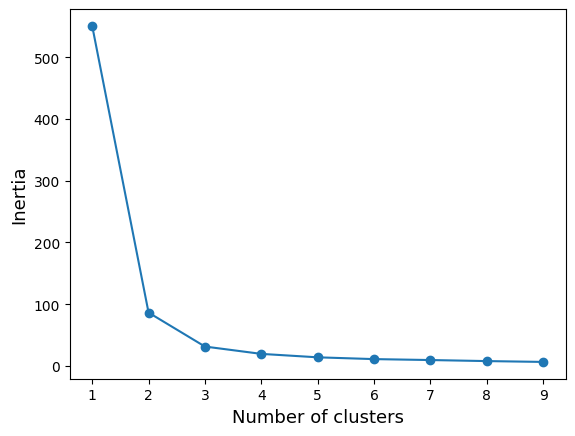

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

intertia_arr=[]
for k in range(1,10):
  kemans = KMeans(n_clusters=k)
  kemans.fit(X)
  intertia= kemans.inertia_
  intertia_arr.append(intertia)
  
plt.style.use('default')
plt.plot(range(1,10),intertia_arr,marker='o')
plt.xlabel('Number of clusters',fontsize=13)
plt.ylabel('Inertia',fontsize=13)
plt.show()

# 3. K-Means Clustering 하기

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.labels_
print(y_pred)
np.unique(y_pred,return_counts=True)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([48, 50, 52]))

TypeError: _AxesBase.set_ybound() got an unexpected keyword argument 'fontsize'

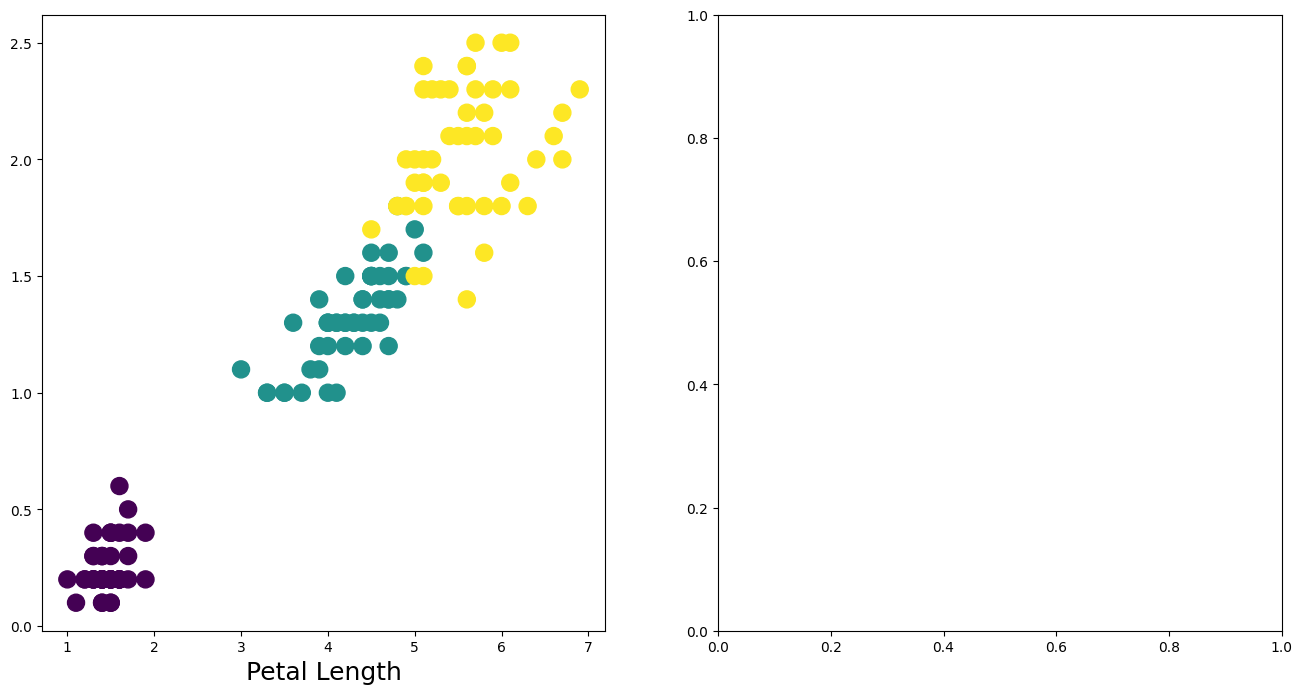

In [20]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].scatter(X[:,0],X[:,1], c=y, s=150)
axes[0].set_xlabel('Petal Length',fontsize = 18)
axes[0].set_ybound('Petal Width', fontsize = 18)
axes[0].tick_params